In [1]:
%load_ext autoreload
%autoreload 2





import pickle


In [2]:
from main import get_data, model

/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [19]:
date = "2024-09-21"
level = "500 mb"
extent = [-91.65, -75.46, 30.14, 36.68]
T, XY, Z, XY_UV = get_data.hrrr(date=date, 
                                    level=level,
                                    hours=4, 
                                    extent=extent, 
                                    factor=1)
data_entry = model.data(T, XY, Z, XY_UV)
data_entry.extent = extent
data_entry.date = date
data_entry.level = level

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws


/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attr

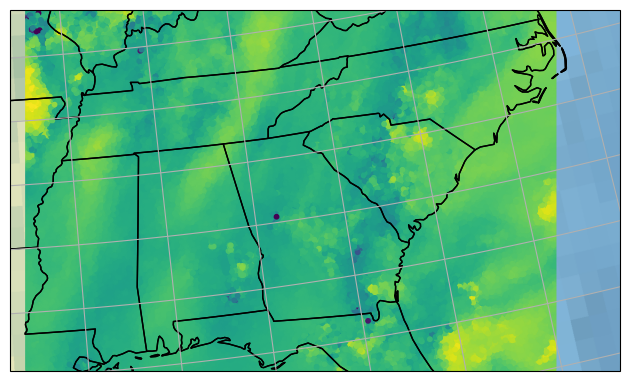

In [20]:
import torch
indices = torch.randperm(data_entry.m)
f = data_entry.plot_observations(indices, frame = 0)

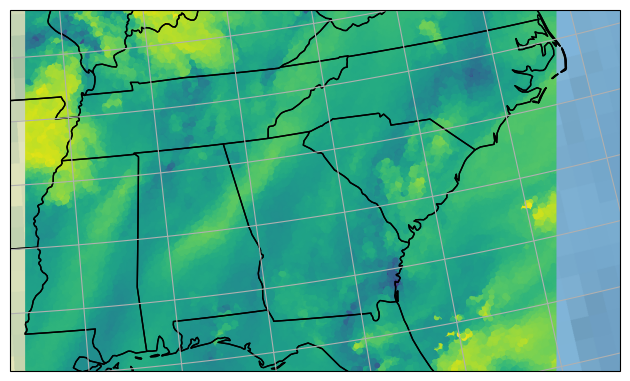

In [21]:
f = data_entry.plot_observations(indices, frame = 4)

In [22]:
date = "2024-09-21"
level = "700 mb"
extent = [-91.65, -75.46, 30.14, 36.68]
T, XY, Z, XY_UV = get_data.hrrr(date=date, 
                                    level=level,
                                    hours=4, 
                                    extent=extent, 
                                    factor=1)
data_entry = model.data(T, XY, Z, XY_UV)
data_entry.extent = extent
data_entry.date = date
data_entry.level = level

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-21 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws


/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attr

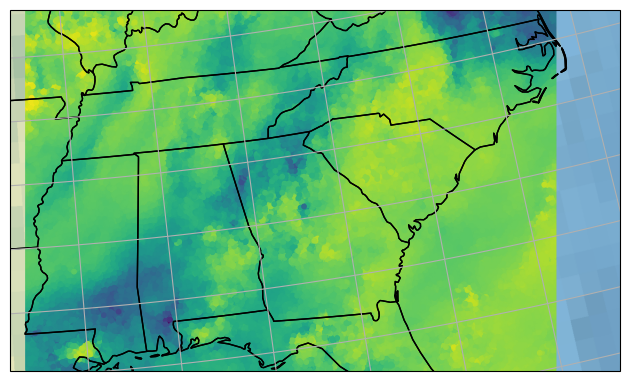

In [23]:
indices = torch.randperm(data_entry.m)
f = data_entry.plot_observations(indices, frame = 0)

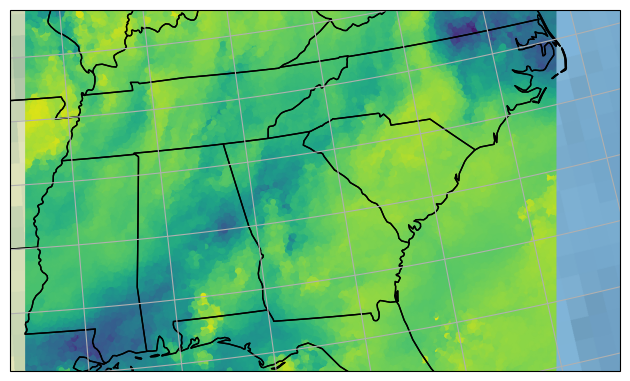

In [24]:
indices = torch.randperm(data_entry.m)
f = data_entry.plot_observations(indices, frame = 4)

In [6]:
from datetime import datetime, timedelta
def generate_time_ranges(date, minutes, start_time="00:00", end_time="23:59"):
    start = datetime.strptime(date + " " + start_time, "%Y-%m-%d %H:%M")
    end = datetime.strptime(date + " " + end_time, "%Y-%m-%d %H:%M")
    
    time_list = [start]
    while time_list[-1] + timedelta(minutes=minutes) <= end:
        time_list.append(time_list[-1] + timedelta(minutes=minutes))
    
    return time_list

In [13]:
generate_time_ranges("2024-08-31", 30, "00:30", "01:30")

[datetime.datetime(2024, 8, 31, 0, 30),
 datetime.datetime(2024, 8, 31, 1, 0),
 datetime.datetime(2024, 8, 31, 1, 30)]